In [94]:
%reload_ext autoreload
%autoreload 2


In [95]:
import numpy as np
import random
from scipy import stats
from six.moves import urllib
import json
import pandas as pd
import math

from load_data import loadnp
from counter import var_counter
from plot import histoplot
import stat_tests as st
import mapping as mp

In [96]:
datapath="../3_Raw_Data/60_Monthly_MeanTemp_2022-2100_UK"
resultpath="../6_Results/data/MaxTemp_Monthly_UK"

In [97]:
#loading data from raw data files, no specificed path goes to V2 directory
[xcoord, ycoord, array4D]=loadnp(datapath)

In [98]:
#stats accroos members
#computing mean and min-max ranges

p90_array=st.run_stats(array4D,resultpath,KStest=True,stats=True,tp_90=True,result='p_90')

300883 fit a normal distribution out of : 301070 with critical value of: 0.25
success rate: 0.9993788819875776


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/npyio.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


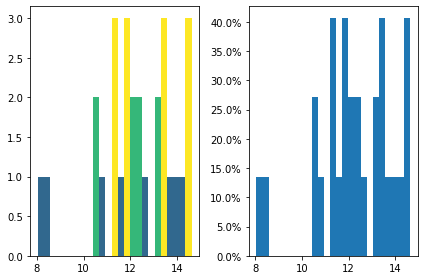

In [99]:
'Note: visualising distribution'
#plotting values across 28 mmbers (1 location, 1 month)
month=random.randint(0,len(array4D[0,:,0,0])-1)
xloc=random.randint(0,len(array4D[0,0,:,0])-1)
yloc=random.randint(0,len(array4D[0,0,0,:])-1)

vars=array4D[:,month,xloc,yloc]

ysort=np.sort(vars)
histoplot(ysort)


In [100]:
'TODO:plot spatial distribution of values, 3D histogram?'

'TODO:plot spatial distribution of values, 3D histogram?'

In [101]:
'Note: coordinate conversion, stored in 1D list of tubles, all (x,y) combinations in order x1,y1 x1,y2, etc'

latlonarray=mp.bulkOSGB36toWGS84(xcoord,ycoord)

In [102]:
mp.PointstoGeojson(latlonarray,foldername="MaxTemp_Monthly_UK",fname='point_coordinates.geojson')

In [130]:
p90_over=var_counter(p90_array,threshold=15,periodiser=20)

In [131]:
squares_array=mp.buildsqrBNG(xcoord,ycoord)

'NOTE:counter produces correct array but not overlayed correcly over squares'
flat_p90_over=mp.PolystoGeojson(squares_array,p90_over, foldername="MaxTemp_Monthly_UK")